In [1]:
# Importing necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#global variable needed in some functions
global mappings

# Function to create a countplot with annotations for a given column
def countplot_with_annot(column, index):
    ax = sns.countplot(data=df, x=column, ax=index)
    
    ax.set_title(f'{column} Distribution')

    total = len(df[column])
    
    for p in ax.patches:
        count = p.get_height()
        percentage = count / total * 100
        ax.annotate(f'{count}, {percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=10, color='black')

    return ax

# Function to remove outliers using the IQR method for a specified column
def remove_outliers_iqr_inplace(df, column, before_index, after_index):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ax0 = sns.boxplot(x=df[column], ax=before_index)
    ax0.set_title(f'Boxplot with outliers for {column}')

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    df.drop(outliers.index, inplace=True)

    ax1 = sns.boxplot(x=df[column], ax=after_index)
    ax1.set_title(f'Boxplot without outliers for {column}')
    
    return ax0, ax1

# Function to factorize categorical columns in a DataFrame
def factorize_columns(df, columns):
    mapping = {}
    for column in columns:
        df[column], codes = pd.factorize(df[column])
        mapping[column] = dict(zip(df[column].unique(), codes))
    return mapping

# Function to train and show stats of different features to prove my concept
def train_show_info(dataframe, columns_to_drop, target_column):
    data = dataframe.copy()
    
    X = data.drop(columns_to_drop, axis=1)
    y = data[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = GaussianNB()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f'Accuracy: {accuracy}\n')

    target_mapping = mappings[target_column]

    y_test_labels = [target_mapping[i] for i in y_test]
    y_pred_labels = [target_mapping[i] for i in y_pred]

    print(classification_report(y_test_labels, y_pred_labels))

    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                                  display_labels=[target_mapping[i] for i in range(len(target_mapping))])
    disp.plot(cmap=plt.cm.Reds, values_format='.0f',)
    plt.title('Confusion Matrix')

    plt.show()
    
    return round(accuracy * 100, 2)

In [3]:
# Specify the file name and read the CSV file into a DataFrame

file_name = 'Student_Performance_Analysis.csv'
df = pd.read_csv(file_name)

# Display the first few rows of the DataFrame
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Check and display the number of missing values in each column of the DataFrame
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
# Display the columns names of the DataFrame
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
# Display the columns types of the DataFrame
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
# Generate descriptive statistics for numerical columns in the DataFrame
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
# Create a new column 'overall_score' by summing the scores from 'math score', 'reading score', and 'writing score'
df['overall_percentage'] = round((df['math score'] + df['reading score'] + df['writing score']) / 300, 2)

# Show the first 5 rows of the data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall_percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,0.73
1,female,group C,some college,standard,completed,69,90,88,0.82
2,female,group B,master's degree,standard,none,90,95,93,0.93
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.49
4,male,group C,some college,standard,none,76,78,75,0.76


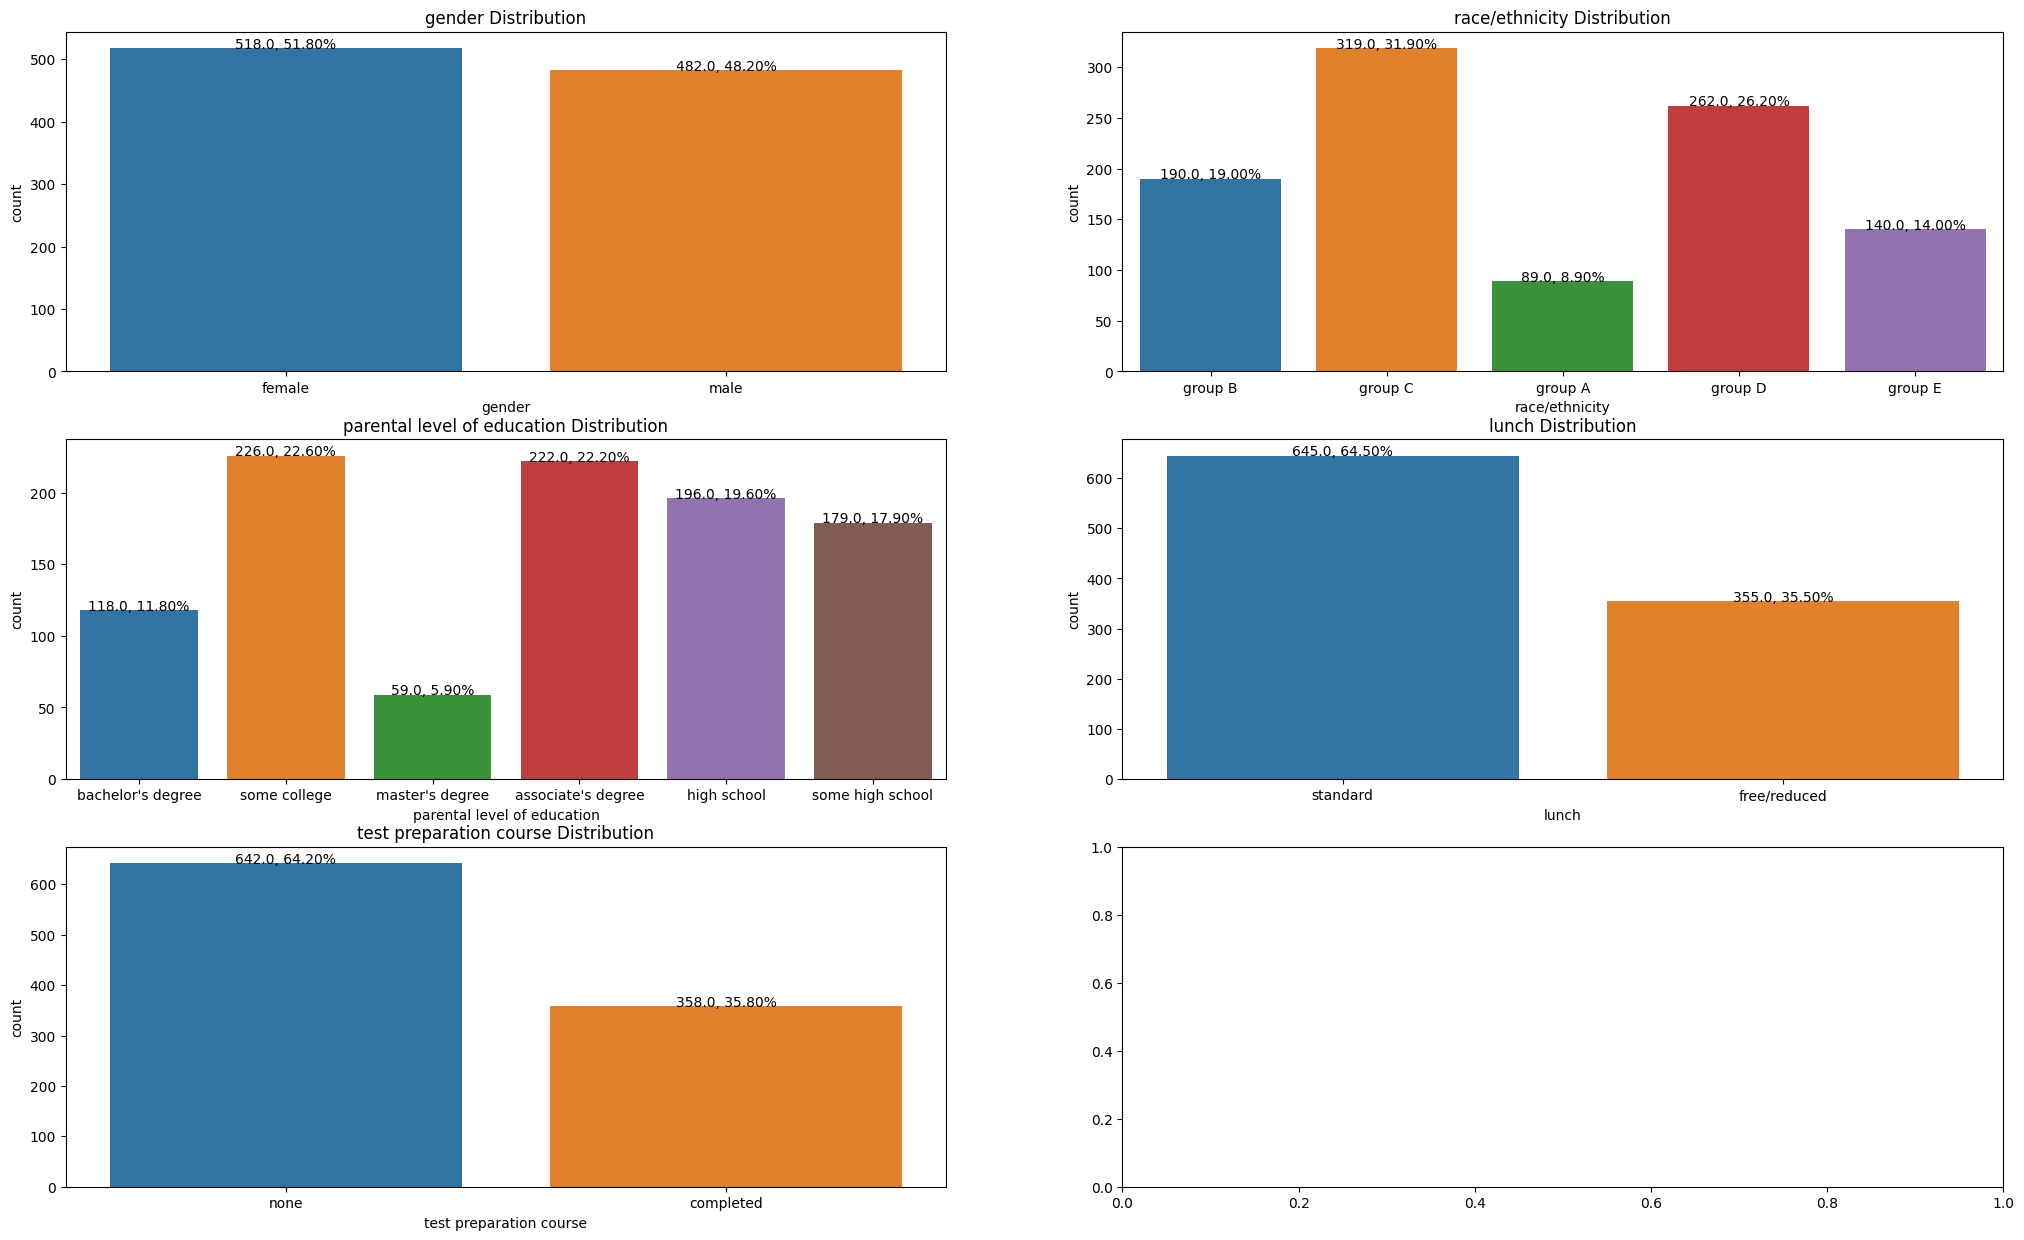

In [9]:
# Create subplots for the countplots 
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25, 15))

# Generate countplots with annotations for each specified column
ax0 = countplot_with_annot('gender', axes[0, 0])
ax1 = countplot_with_annot('race/ethnicity', axes[0, 1])
ax2 = countplot_with_annot('parental level of education', axes[1, 0])
ax3 = countplot_with_annot('lunch', axes[1, 1])
ax4 = countplot_with_annot('test preparation course', axes[2, 0])

# Display the subplots
plt.show()

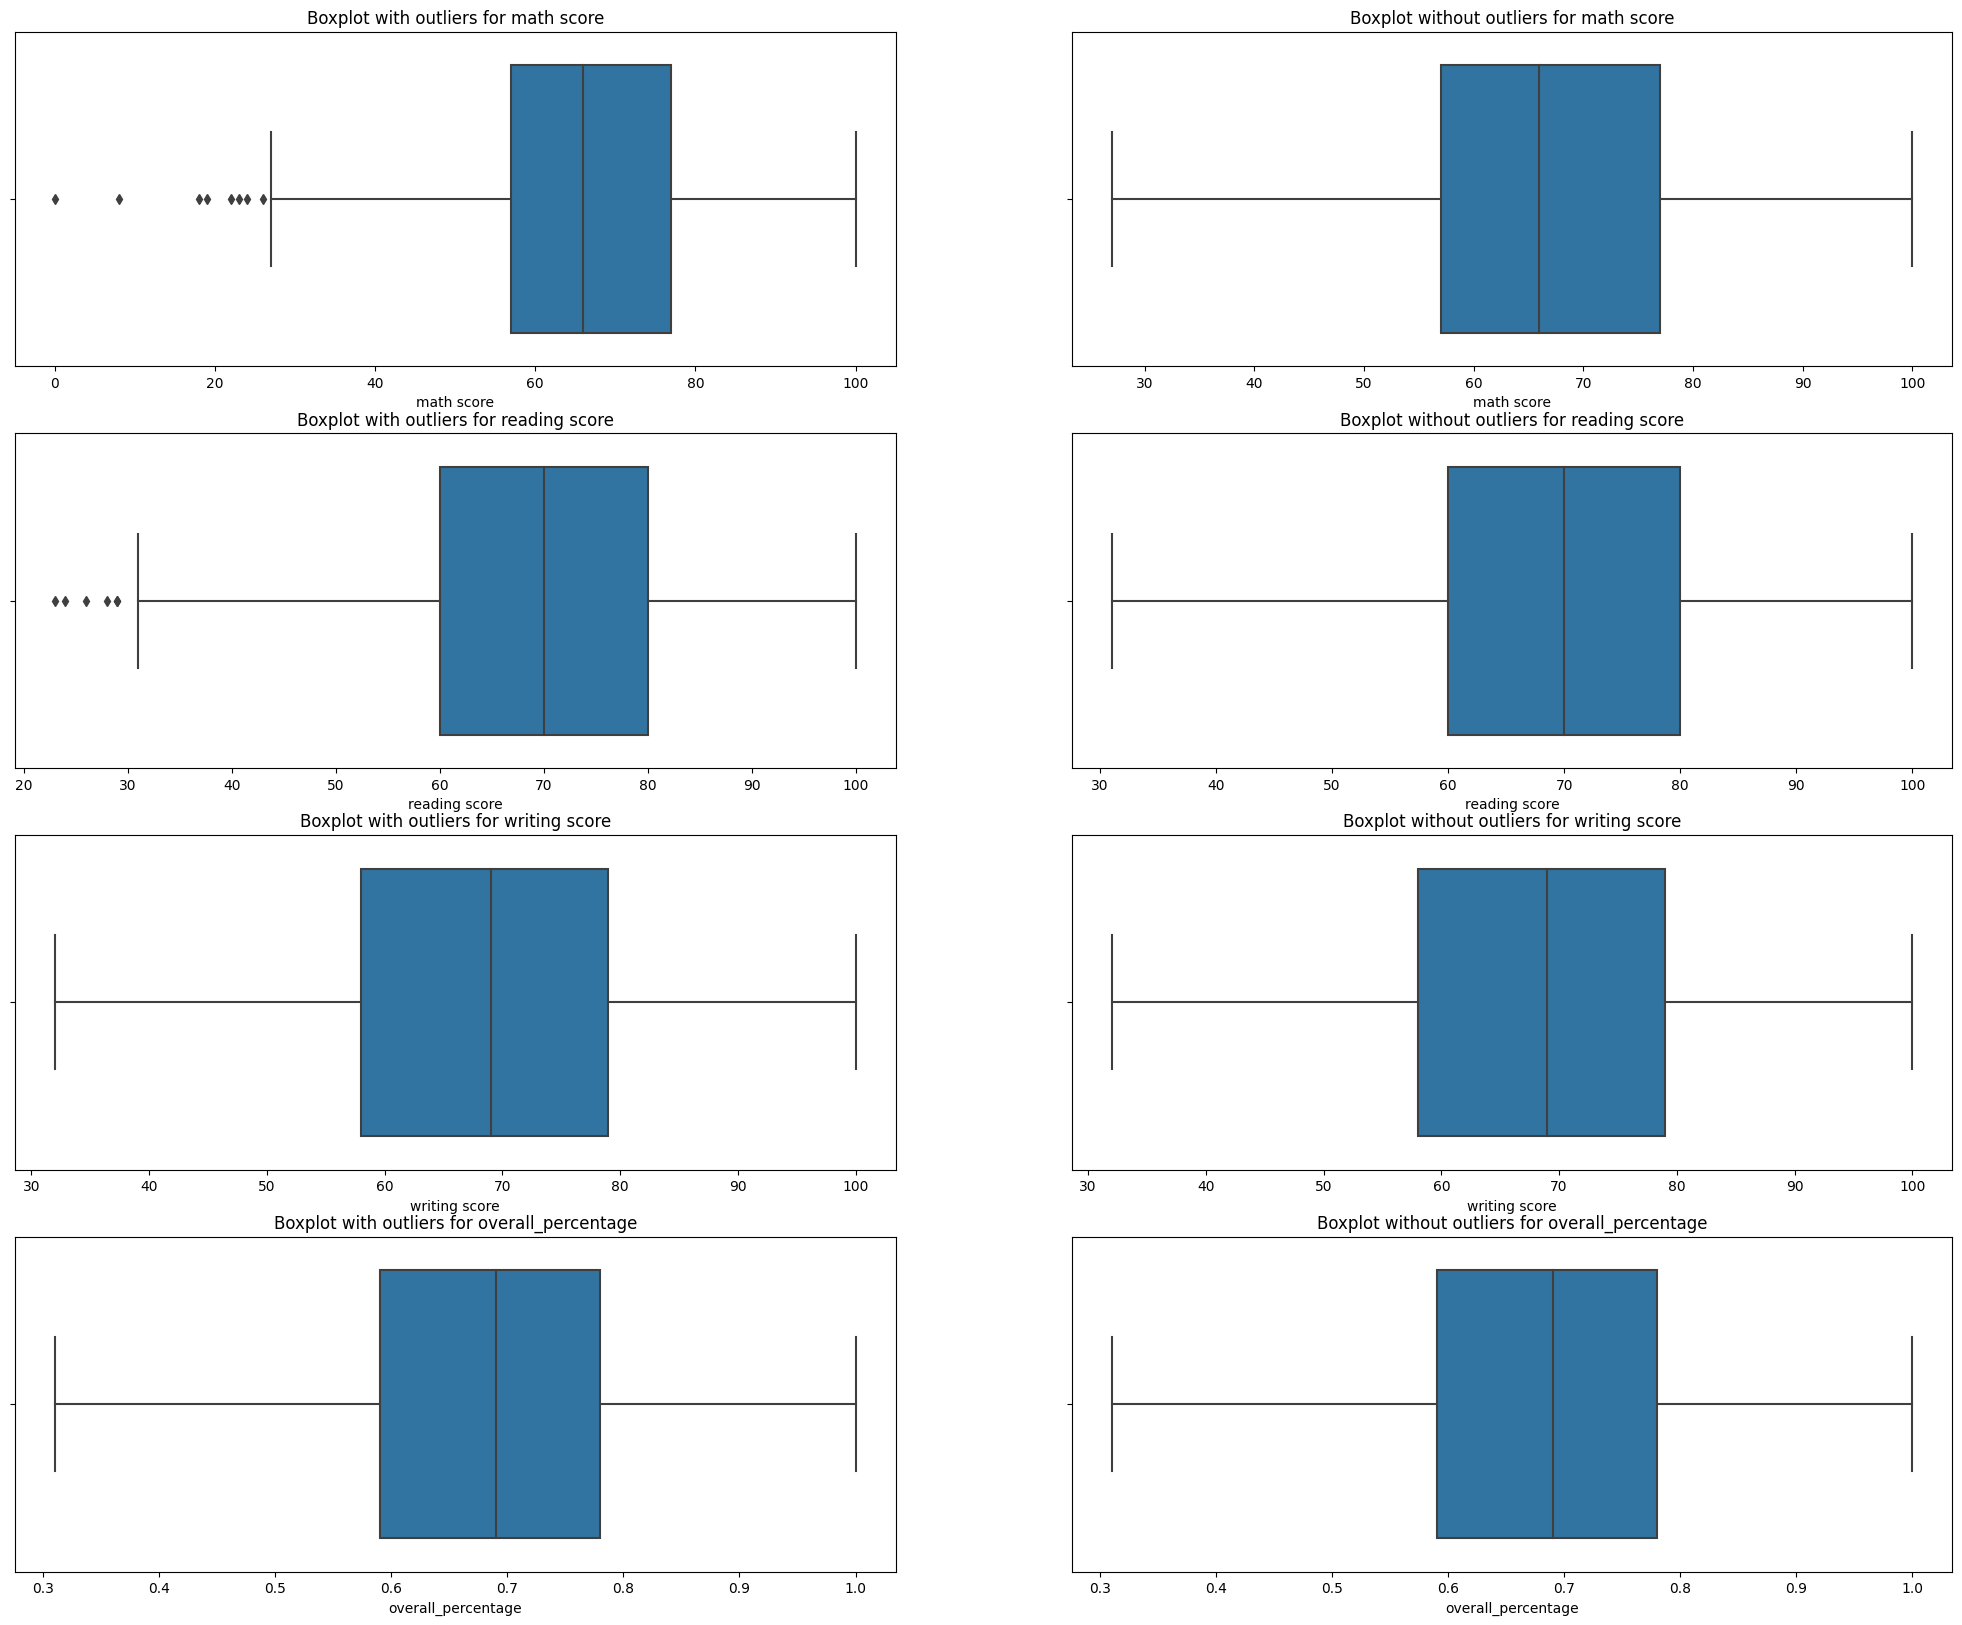

In [10]:
# Create subplots for boxplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25, 20))

# Remove outliers and display boxplots for each column
ax0, ax1 = remove_outliers_iqr_inplace(df, 'math score', axes[0, 0], axes[0, 1])
ax2, ax3 = remove_outliers_iqr_inplace(df, 'reading score', axes[1, 0], axes[1, 1])
ax4, ax5 = remove_outliers_iqr_inplace(df, 'writing score', axes[2, 0], axes[2, 1])
ax6, ax7 = remove_outliers_iqr_inplace(df, 'overall_percentage', axes[3, 0], axes[3, 1])

# Display the subplots
plt.show()

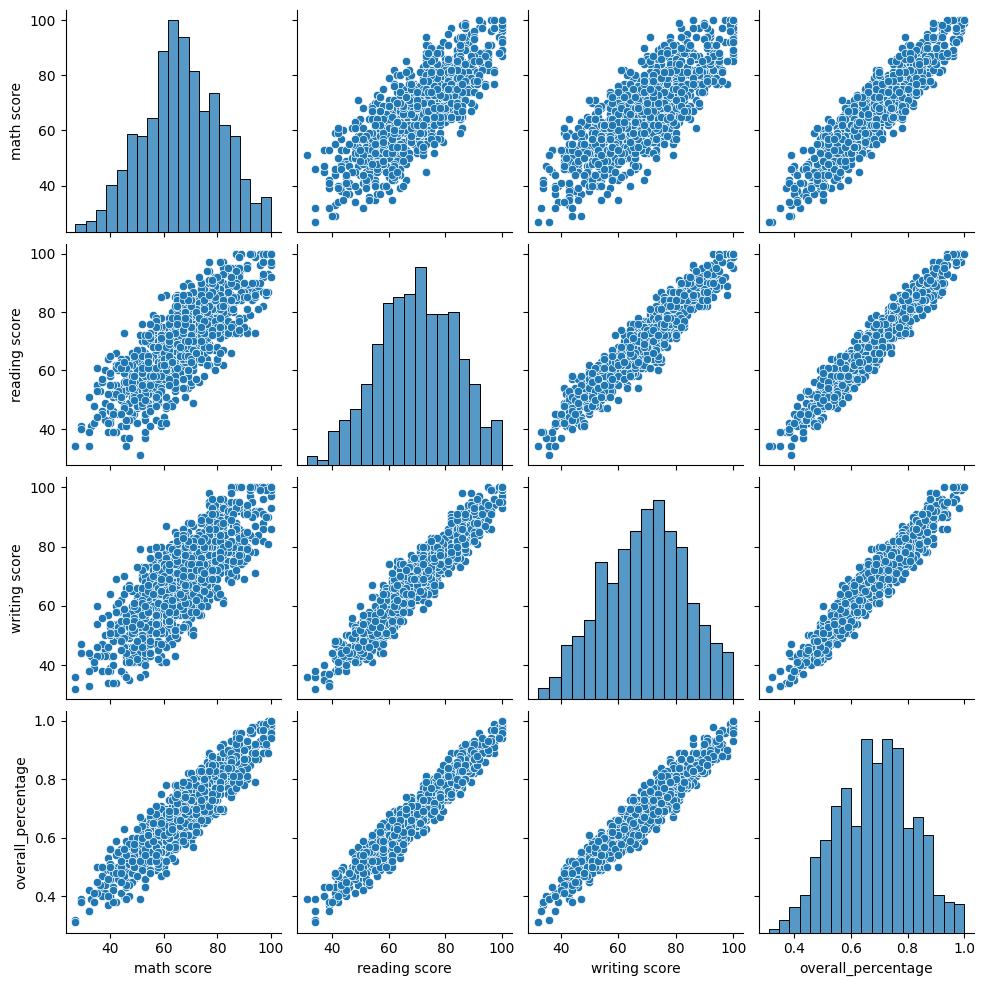

In [11]:
# Create a pairplot to visualize relationships between specified numerical columns
sns.pairplot(df[['math score', 'reading score', 'writing score', 'overall_percentage']])

# Display the pairplot
plt.show()

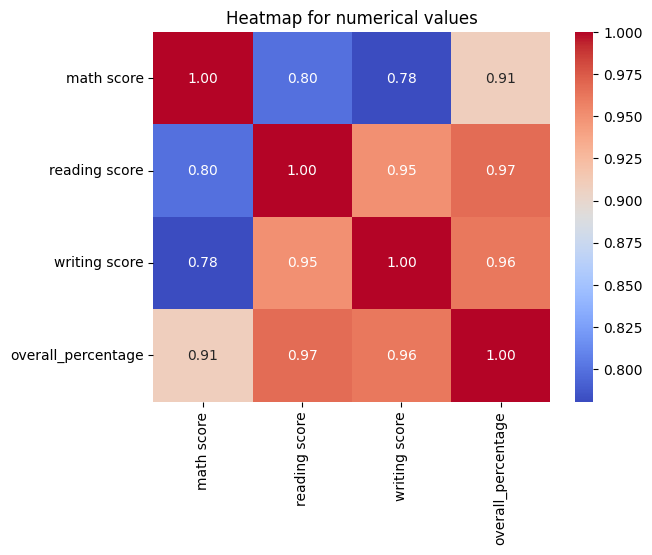

In [12]:
# Create a correlation matrix for specified numerical columns
correlation_matrix = df[['math score', 'reading score', 'writing score', 'overall_percentage']].corr()

# Generate and display heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap for numerical values')
plt.show()

In [13]:
# Define columns to factorize and create mappings
columns_to_factorize = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

mappings = factorize_columns(df, columns=columns_to_factorize)

# Display the first 5 rows of the DataFrame after factorization
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall_percentage
0,0,0,0,0,0,72,72,74,0.73
1,0,1,1,0,1,69,90,88,0.82
2,0,0,2,0,0,90,95,93,0.93
3,1,2,3,1,0,47,57,44,0.49
4,1,1,1,0,0,76,78,75,0.76


In [14]:
#Show mappings
mappings

{'gender': {0: 'female', 1: 'male'},
 'race/ethnicity': {0: 'group B',
  1: 'group C',
  2: 'group A',
  3: 'group D',
  4: 'group E'},
 'parental level of education': {0: "bachelor's degree",
  1: 'some college',
  2: "master's degree",
  3: "associate's degree",
  4: 'high school',
  5: 'some high school'},
 'lunch': {0: 'standard', 1: 'free/reduced'},
 'test preparation course': {0: 'none', 1: 'completed'}}

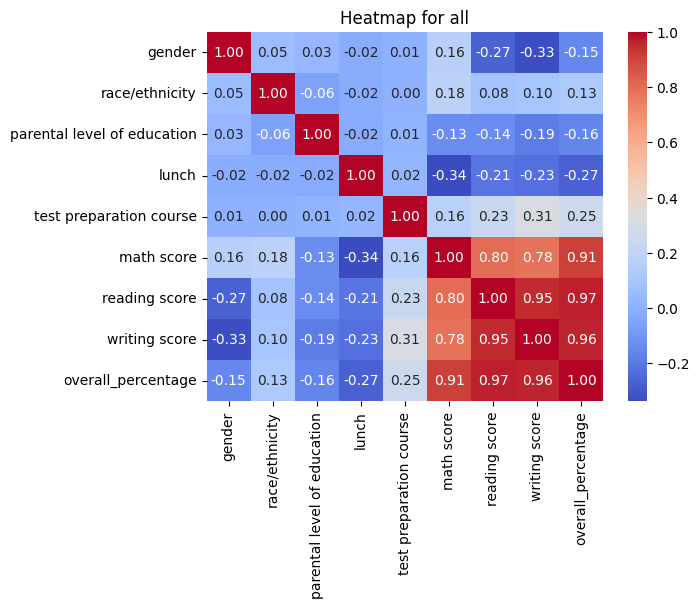

In [15]:
# Calculate the correlation matrix for all columns in the DataFrame
correlation_matrix = df.corr()

# Create and display heatmap to visualize the correlation matrix for all columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap for all')
plt.show()

In [16]:
# Initialize an empty dictionary to store accuracy scores for different sets
sets_acc = {}

# Specify the target column for classification
target_column = 'test preparation course'

Accuracy: 0.7525252525252525

              precision    recall  f1-score   support

   completed       0.65      0.43      0.51        61
        none       0.78      0.90      0.83       137

    accuracy                           0.75       198
   macro avg       0.71      0.66      0.67       198
weighted avg       0.74      0.75      0.74       198



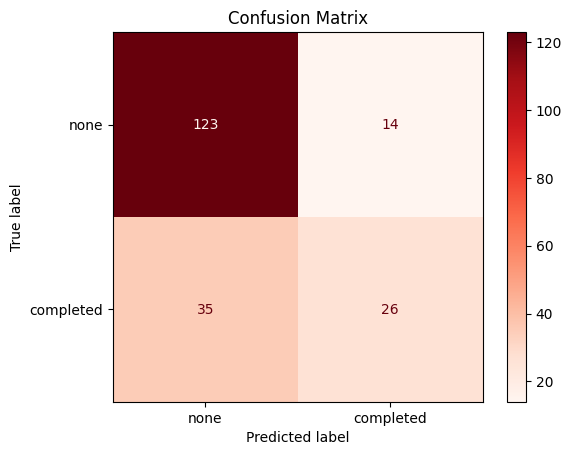

In [17]:
# Specify columns to drop from the dataframe
# Drop columns with very weak correlation with the target class: 'gender', 'race/ethnicity', 'parental level of education', 'lunch'
# Drop the target column 'test preparation course'
# Drop columns 'overall_percentage', 'math score', 'reading score' and keep 'writing score'
# These columns are dropped as they have high correlation with each other, and 'writing score' has the highest correlation with the target class.
columns_to_drop_main = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'overall_percentage', 'math score', 'reading score']

sets_acc['main_set'] = train_show_info(df, columns_to_drop_main, target_column)

Accuracy: 0.702020202020202

              precision    recall  f1-score   support

   completed       0.75      0.05      0.09        61
        none       0.70      0.99      0.82       137

    accuracy                           0.70       198
   macro avg       0.73      0.52      0.46       198
weighted avg       0.72      0.70      0.60       198



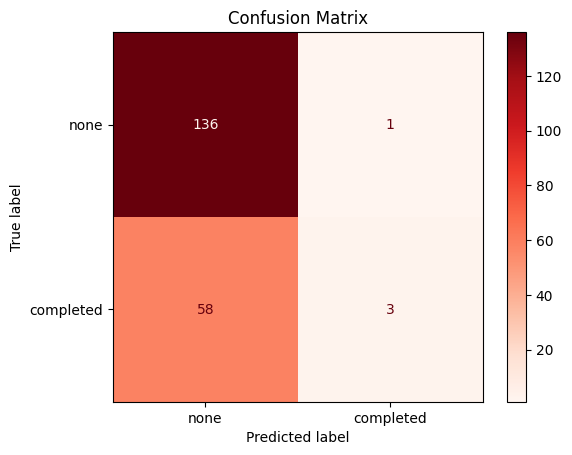

In [18]:
# Prove of concept dropped the highest-corrleated 'writing score' with target, and left only 'math score' which is the least-corrleated.
# Accuracy can tell the difference

columns_to_drop_set0 = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'overall_percentage', 'writing score', 'reading score']

sets_acc['set0'] = train_show_info(df, columns_to_drop_set0, target_column)

Accuracy: 0.6666666666666666

              precision    recall  f1-score   support

   completed       0.47      0.56      0.51        61
        none       0.78      0.72      0.75       137

    accuracy                           0.67       198
   macro avg       0.62      0.64      0.63       198
weighted avg       0.69      0.67      0.67       198



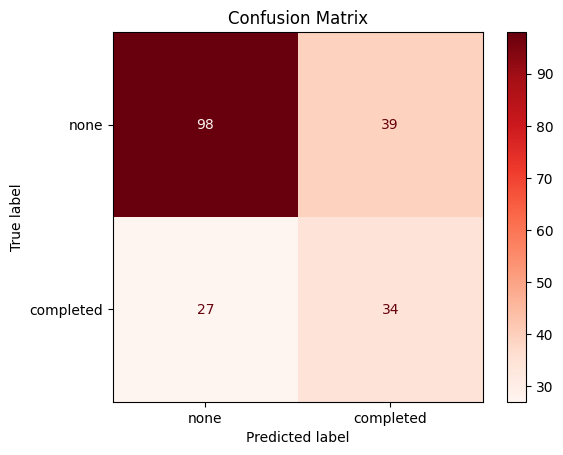

In [19]:
# To prove the concept more lets leave the 4 highly corrlated columns 
# 'overall_percentage', 'math score', 'reading score', and 'writing score'
# Accuracy can tell the difference again

columns_to_drop_set0 = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

sets_acc['set1'] = train_show_info(df, columns_to_drop_set0, target_column)

Accuracy: 0.6565656565656566

              precision    recall  f1-score   support

   completed       0.45      0.54      0.49        61
        none       0.78      0.71      0.74       137

    accuracy                           0.66       198
   macro avg       0.61      0.62      0.62       198
weighted avg       0.68      0.66      0.66       198



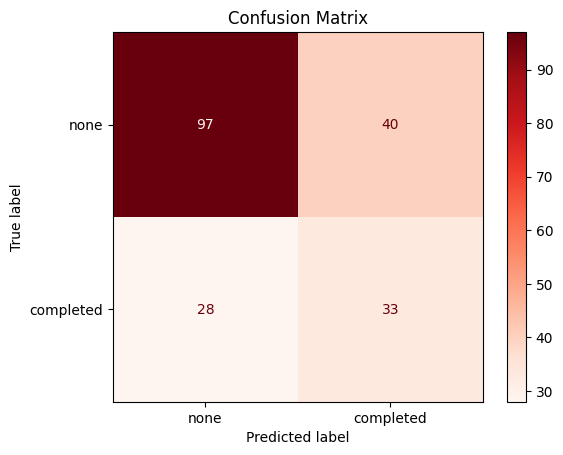

In [20]:
# To prove the importance of feature extraction lets only drop the target column

sets_acc['set2'] = train_show_info(df, [target_column], target_column)

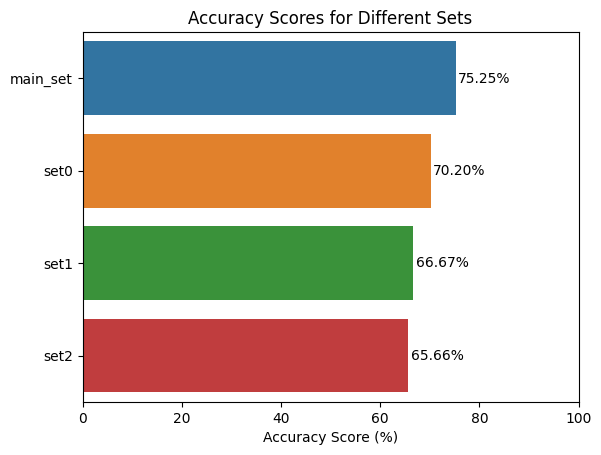

In [21]:
ax = sns.barplot(x=list(sets_acc.values()), y=list(sets_acc.keys()))
plt.title('Accuracy Scores for Different Sets')
plt.xlabel('Accuracy Score (%)')
plt.xlim(0, 100)

for i, v in enumerate(sets_acc.values()):
    ax.text(v + 0.5, i, f'{v:.2f}%', color='black', ha='left', va='center', fontsize=10)

plt.show()